## Intro for CIFAR10 Dataset & Data Visualization & KNN & Train-Test Split

**Author:** Ece Tosun  
**Date:** October 2025

**Email**: ece.tosun@sabanciuniv.edu

In [1]:
# Make sure you have these libraries
# !pip install matplotlib
# !pip install tensorflow
# !pip install scikit-learn

# Introduction to Libraries

In this notebook, we will use three essential Python libraries for data science and machine learning:  
**Matplotlib**, **TensorFlow (with Keras)**, and **Scikit-learn**.  

---

## Matplotlib
- A powerful library for data visualization.  
- **Use cases:**
  - Create plots like line charts, bar charts, scatter plots, histograms.
  - Visualize images (e.g., MNIST digits).
  - Customize plots with titles, labels, legends, and colors.  

---

## TensorFlow (with Keras)
- An open-source deep learning framework developed by Google.  
  It includes **Keras**, a high-level API that makes it easier to build neural networks.  
- **Use cases:**
  - Training deep learning models such as CNNs, RNNs, and Transformers.
  - Computer vision tasks (image classification, object detection).
  - Natural language processing (text classification, translation, chatbots).
  - Time-series forecasting and reinforcement learning.  

---

## Scikit-learn
- A widely used library for classical machine learning in Python.  
- **Use cases:**
  - Training traditional ML models like K-Nearest Neighbors, Decision Trees, Random Forests, and SVMs.
  - Preprocessing data (scaling, encoding, train/test splitting).
  - Model evaluation (cross-validation, confusion matrices, classification reports).  

### Data Loading

#### CIFAR-10 Dataset
- CIFAR-10 is a collection of **60,000 color images (32×32 pixels)** across **10 different classes**.  
- **Classes:** airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.  

<img src="cifar10.jpg" alt="Summary of Normalization Methods" width="500"/>

In [2]:
# https://keras.io/api/datasets/cifar10/
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

2025-10-06 17:29:34.577969: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-06 17:29:34.578223: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-06 17:29:34.615683: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-06 17:29:35.702733: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

As a convention in machine learning, a dataset is represented as matrix of size N x d, where N is the number of samples
in the dataset, and d is the dimensionality of the feature vector. All the models in scikit-learn follow this convention. Therefore,
if our dataset is already not in this format, we need reshape it. (Using flatten())

## Taking Sample Data and Splitting

In [3]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np

# Load CIFAR-10
(X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10.load_data()

# Flatten labels
y_train_full = y_train_full.flatten()
y_test_full = y_test_full.flatten()

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Take 10,000 samples in total
X_full = np.concatenate([X_train_full, X_test_full], axis=0)[:10000]
y_full = np.concatenate([y_train_full, y_test_full], axis=0)[:10000]


# Stratified splitting ensures that the class distribution is preserved in train and test sets.
# This is crucial when dealing with imbalanced datasets, as it prevents over-representation of some classes
# and under-representation of others in either set.

# First split: Train (80%) vs Temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_full, y_full, test_size=0.2, stratify=y_full, random_state=1231
)

# Second split: Validation (10%) vs Test (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=1231
)

print("Training data shape:", X_train.shape, "Labels:", y_train.shape)
print("Validation data shape:", X_val.shape, "Labels:", y_val.shape)
print("Test data shape:", X_test.shape, "Labels:", y_test.shape)

Training data shape: (8000, 32, 32, 3) Labels: (8000,)
Validation data shape: (1000, 32, 32, 3) Labels: (1000,)
Test data shape: (1000, 32, 32, 3) Labels: (1000,)


In [4]:
# How many classes are there in CIFAR-10?
num_classes = len(np.unique(y_train))  # unique labels in training set
print("Number of classes in CIFAR-10:", num_classes)

# How many samples from each class are there in the training set?
for i in range(num_classes):
    num_samples_i = (y_train == i).sum()
    print("There are {} samples from class {} ({})".format(num_samples_i, i, class_names[i]))
    # print(f"There are {num_samples_i} samples from class {i} ({class_names[i]})") another way 

Number of classes in CIFAR-10: 10
There are 804 samples from class 0 (airplane)
There are 779 samples from class 1 (automobile)
There are 826 samples from class 2 (bird)
There are 813 samples from class 3 (cat)
There are 799 samples from class 4 (deer)
There are 749 samples from class 5 (dog)
There are 824 samples from class 6 (frog)
There are 801 samples from class 7 (horse)
There are 820 samples from class 8 (ship)
There are 785 samples from class 9 (truck)


In [5]:
print('Range of values in the training set: ', [X_train.min(), X_train.max()])

Range of values in the training set:  [0, 255]


Normally, we would look at the range of values separately for each feature, since each feature generally represents a different quantity (age, income). 
  
But for our dataset, all features are intensity values of pixels. Therefore we can look at the range of feature values collectively.

In [6]:
print(X_train[0])
# shape it 32x32x3 -> 3 stands for RGB values, the first element of the matrix is the first row so it has 32 elements
# in total it has 32x32 pixel and each color represented with RGB

[[[123 123 118]
  [ 73  77  66]
  [114 122 103]
  ...
  [242 231 230]
  [243 236 234]
  [240 235 232]]

 [[229 226 226]
  [196 196 191]
  [184 187 176]
  ...
  [244 230 230]
  [246 235 235]
  [246 237 236]]

 [[221 214 218]
  [226 220 220]
  [226 222 219]
  ...
  [240 221 223]
  [243 226 227]
  [245 231 231]]

 ...

 [[188 167 174]
  [190 165 173]
  [199 168 179]
  ...
  [193 153 161]
  [197 168 173]
  [200 175 182]]

 [[186 165 172]
  [190 164 172]
  [198 167 178]
  ...
  [192 152 160]
  [197 168 174]
  [199 175 182]]

 [[180 159 166]
  [186 160 169]
  [195 164 175]
  ...
  [185 146 154]
  [192 163 169]
  [194 170 178]]]


## Visualization

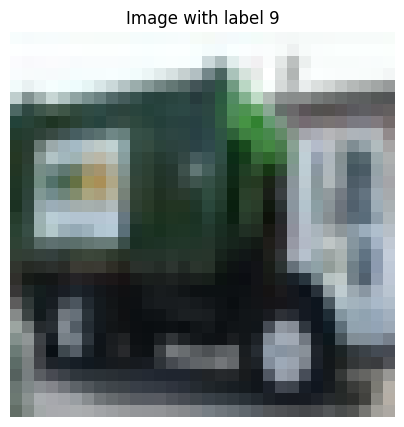

In [7]:
# visualize some of the samples - 1
import matplotlib.pyplot as plt

idx = 99 # pick by index
image, label = X_train[idx], y_train[idx]

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title('Image with label {}'.format(label))
plt.axis('off')
plt.show()

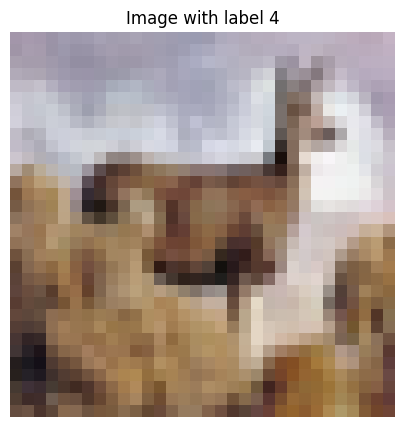

In [8]:
# visualize some of the samples - 2

class_label = 4 # randomly pick based on class_label -> run this cell multiple times
num_samples_i = (y_train == class_label).sum()

rand_idx = np.random.randint(low=0, high=num_samples_i)
image, label = X_train[y_train == class_label][rand_idx], y_train[y_train == class_label][rand_idx]

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title('Image with label {}'.format(label))
plt.axis('off')
plt.show()

#### Simple Data Analysis

In [9]:
import numpy as np

print("Data type of X_train:", X_train.dtype)
print("Min pixel value:", np.min(X_train))
print("Max pixel value:", np.max(X_train))
print("Unique classes in y_train:", np.unique(y_train))
print("Mean pixel value (per channel):", np.mean(X_train, axis=(0,1,2)))
print("Standard deviation (per channel):", np.std(X_train, axis=(0,1,2)))
# by channel we mean the RGB channels so we can understand the dominant color using this 
# so for example in here Red and Green are more dominant to Blue

Data type of X_train: uint8
Min pixel value: 0
Max pixel value: 255
Unique classes in y_train: [0 1 2 3 4 5 6 7 8 9]
Mean pixel value (per channel): [125.73878394 123.17448596 114.01498889]
Standard deviation (per channel): [63.05928778 62.38114214 66.94808733]


#### Checking Class Distribution

In [10]:
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts)) # Storing the values in a dictionary
print("Class Distribution:", class_distribution)

Class Distribution: {0: 804, 1: 779, 2: 826, 3: 813, 4: 799, 5: 749, 6: 824, 7: 801, 8: 820, 9: 785}


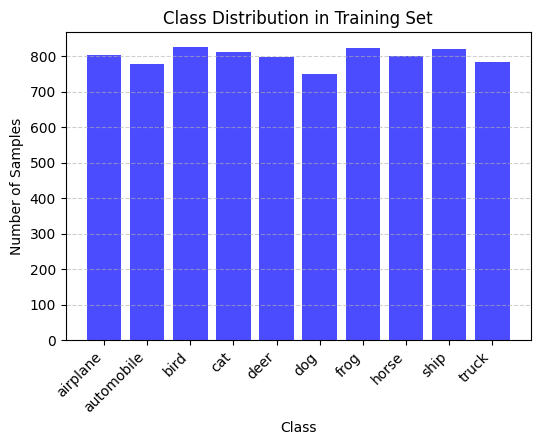

In [11]:
import matplotlib.pyplot as plt

unique, counts = np.unique(y_train, return_counts=True)

# Plot class distribution
plt.figure(figsize=(6, 4))
plt.bar(unique, counts, color="blue", alpha=0.7)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Set")
plt.xticks(unique, class_names, rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


#### Display Example Data

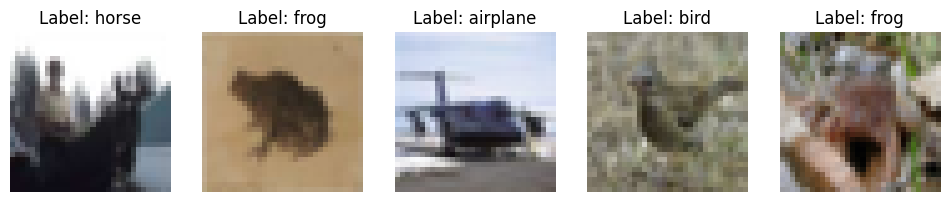

In [12]:
# Display Sample Images
import matplotlib.pyplot as plt

# Show a few random images
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    idx = np.random.randint(0, len(X_train))
    ax.imshow(X_train[idx])
    ax.set_title(f"Label: {class_names[y_train[idx]]}")
    ax.axis("off")
plt.show()

## Data Preprocessing

### Data Normalization

Normalization scales input features (image pixel values) so that they have a similar range, usually zero mean and unit variance.

**Why It Matters:**
1. **Improves stability and convergence** – models train faster and more reliably.  
2. **Balances feature influence** – prevents large-valued features from dominating.  
3. **Ensures consistent scaling** – uses training set statistics for validation and test data.  
4. **Enables fair distance measures** – essential for algorithms like KNN or SVM.

**Formula:**
X_norm = (X - mean) / std

**Summary:**

| Aspect | Without Normalization | With Normalization |
|--------|-----------------------|--------------------|
| Pixel range | 0–255 | Mean ≈ 0, Std ≈ 1 |
| Training stability | Unstable, slow | Stable, faster |
| Feature influence | Unequal | Balanced |
| Generalization | Poor | Improved |


You can think of normalization like comparing a Dog's age to a Human's age. Since they use different scales, you can't compare them directly. Normalization is the process of finding a standard "conversion factor" to put both ages onto a shared, understandable scale for meaningful comparison.

With normalization we find a rule for that conversion factor.

https://towardsdatascience.com/normalization-vs-standardization-which-one-is-better-f29e043a57eb

<img src="normalization_standardization.jpg" alt="Normalization vs. Standardization" width="500"/>

<img src="summary_n_s.png" alt="Summary of Normalization Methods" width="500"/>

### **Normalization using Numpy**

#### NumPy Normalization
- **Function:** Manual normalization using `np.mean()` and `np.std()`.
- **Purpose:**
  - **Standardization:** `(X - mean) / std` computed manually.
  - Typically applied to image data where per-channel normalization is required.
- **Features:**
  - Works on **multi-dimensional arrays** (2D, 3D, 4D, etc.).
  - Uses NumPy’s **broadcasting** to apply per-channel mean/std to the entire dataset.
  - Allows normalization of **each channel independently** (e.g., R, G, B).

In [13]:
# Compute mean and standard deviation from training set (per channel)
mean = np.mean(X_train, axis=(0, 1, 2))  # Compute mean for each channel (R, G, B)
std = np.std(X_train, axis=(0, 1, 2))  # Compute std for each channel

print("Shape of the mean array:", mean.shape)
print("Shape of the std array:", std.shape)

# Apply normalization: (X - mean) / std
X_train_norm = (X_train - mean) / std
X_val_norm = (X_val - mean) / std
X_test_norm = (X_test - mean) / std

print("\nMean before NumPy normalization:", np.mean(X_train, axis=(0, 1, 2)))
print("Std before NumPy normalization:", np.std(X_train, axis=(0, 1, 2)))

print("\nMean after NumPy normalization (should be ~0):", np.mean(X_train_norm, axis=(0, 1, 2)))
print("Std after NumPy normalization (should be ~1):", np.std(X_train_norm, axis=(0, 1, 2)))

Shape of the mean array: (3,)
Shape of the std array: (3,)

Mean before NumPy normalization: [125.73878394 123.17448596 114.01498889]
Std before NumPy normalization: [63.05928778 62.38114214 66.94808733]

Mean after NumPy normalization (should be ~0): [-2.79568035e-17  6.18879947e-17  3.28626015e-17]
Std after NumPy normalization (should be ~1): [1. 1. 1.]


### **Normalization using Scikit-Learn**


#### scikit-learn Normalization
- **Function:** Uses `sklearn.preprocessing.StandardScaler` or `MinMaxScaler`.
- **Purpose:**  
  - **Standardization:** `(X - mean) / std`  
  - **Min-Max Normalization:** `(X - min) / (max - min)`
- **Features:**
  - Works **column-wise** (per feature) on **2D arrays**: shape must be `(n_samples, n_features)`.
  - Automatically computes `mean`, `std`, `min`, `max` from training data using `.fit()`.
  - Ensures consistent transformation across train/test splits with `.transform()`.
  - Easily integrable with **ML pipelines** and prevents **data leakage**.

- **Why Reshape is Often Needed:**
  - `scikit-learn` scalers expect **2D input** only.
  - For image data or 3D arrays like `(num_samples, height, width, channels)`, you must:
    - **Reshape to 2D** (e.g., flatten images) → `(n_samples, -1)`
    - Or **normalize per channel** manually (use NumPy for that).
  - Reshaping example:
    ```python
    X_reshaped = X.reshape(X.shape[0], -1)  # Convert (n_samples, H, W, C) → (n_samples, features)
    ```

- **Limitation with 3D Data (e.g., images):**
  - Not designed for per-channel or spatial normalization.
  - Use **NumPy or deep learning frameworks** (like `torchvision.transforms`) instead for image-like data.

---

In [14]:
from sklearn.preprocessing import StandardScaler

# Reshape the data to 2D for StandardScaler (flatten each image)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print('X_train Shape', X_train.shape)
print('X_train_flat Shape', X_train_flat.shape)

# Create StandardScaler and fit on "training" data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
    # or you can do it seperately if you want to fit use scaler to another data
    # scaler.fit(X_train_flat)
    # X_train_scaled = scaler.transform(X_train_flat)
X_val_scaled = scaler.transform(X_val_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Reshape back to original image shape
X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_val_scaled = X_val_scaled.reshape(X_val.shape)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

print("\nMean after Scikit-Learn normalization (should be ~0):", np.mean(X_train_scaled, axis=(0, 1, 2)))
print("Std after Scikit-Learn normalization (should be ~1):", np.std(X_train_scaled, axis=(0, 1, 2)))

X_train Shape (8000, 32, 32, 3)
X_train_flat Shape (8000, 3072)

Mean after Scikit-Learn normalization (should be ~0): [8.30312815e-16 2.55906749e-16 8.46832641e-17]
Std after Scikit-Learn normalization (should be ~1): [1. 1. 1.]


####  Comparison: scikit-learn vs. NumPy Normalization

| Feature                           | scikit-learn Normalization                      | NumPy Normalization                             |
|-----------------------------------|--------------------------------------------------|--------------------------------------------------|
| **Purpose**                       | Standardization or Min-Max scaling              | Mostly standardization (manual)                 |
| **Main Functions**                | `StandardScaler`, `MinMaxScaler`                | `np.mean()`, `np.std()`                         |               |
| **Data Shape Requirement**        | Expects 2D array: `(samples, features)`         | Supports 2D, 3D, 4D (e.g., images)              |                                         |
| **Per-Channel Normalization**     | Not supported directly                          | Applicable
| **Reshaping Needed**              |  Required for 3D data                          | Not required with proper axis usage          |

- Use **scikit-learn** when working with structured 2D data in machine learning workflows (e.g., tabular datasets).
- Use **NumPy** when dealing with **multi-dimensional data** like images or time series where **per-channel** or **custom normalization** is needed.

### Building KNN Classifier

In [15]:
# Reshape images from (num_samples, height, width, channels) → (num_samples, height * width * channels)
# KNN works with 2D Input Data
X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_val_flat = X_val_scaled.reshape(X_val_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

print('X_train_scaled Shape', X_train_scaled.shape)
print('X_train_flat Shape', X_train_flat.shape)

X_train_scaled Shape (8000, 32, 32, 3)
X_train_flat Shape (8000, 3072)


#### Toy Example to Show Scikit-Learn Models Work

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report # useful functions for evaluation

# Initialize Model (with hyperparameters)
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')

# Train Model
knn.fit(X_train_flat, y_train)

# Predict on validation set
y_pred = knn.predict(X_val_flat)
y_probs = knn.predict_proba(X_val_flat)

# Evaluation
acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {acc:.4f}")

# Classification Report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

idx = 0  # change to test different samples
print("True label:", y_val[idx])
print("Predicted label:", y_pred[idx])
print("Class probabilities:", y_probs[idx])

Validation Accuracy: 0.2490

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.63      0.42       100
           1       0.37      0.13      0.20        97
           2       0.16      0.45      0.23       103
           3       0.28      0.26      0.27       102
           4       0.16      0.28      0.20       100
           5       0.29      0.15      0.20        94
           6       0.24      0.12      0.16       103
           7       0.50      0.08      0.14       100
           8       0.42      0.31      0.36       103
           9       0.86      0.06      0.11        98

    accuracy                           0.25      1000
   macro avg       0.36      0.25      0.23      1000
weighted avg       0.36      0.25      0.23      1000

True label: 3
Predicted label: 0
Class probabilities: [0.5 0.  0.  0.  0.  0.  0.5 0.  0.  0. ]


### Building the Real Model 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Hyperparameter search space
k_values = [1,3,5,7]

best_k =  None
best_accuracy = 0

# Iterate over hyperparameters
for k in k_values:
    # Train classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train_flat, y_train)

    # Evaluate on validation set
    y_val_pred = knn.predict(X_val_flat)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    print(f"k={k}-> Validation Accuracy: {val_accuracy:.4f}")

    # Track for the best model
    if val_accuracy > best_accuracy:
        best_k = k
        best_accuracy = val_accuracy

print(f"\nBest k={best_k}, Best Validation Accuracy: {best_accuracy:.4f}")

k=1-> Validation Accuracy: 0.2930
k=3-> Validation Accuracy: 0.2840
k=5-> Validation Accuracy: 0.2940
k=7-> Validation Accuracy: 0.3050

Best k=7, Best Validation Accuracy: 0.3050


In [30]:
# Train KNN with k=1
knn = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
knn.fit(X_train_flat, y_train)

# Training accuracy (should be ~100% because KNN with k=1 memorizes training data)
y_train_pred = knn.predict(X_train_flat)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"KNN (k=1) Train Accuracy: {train_accuracy:.4f}")

# Validation accuracy (will be much lower, showing overfitting)
y_val_pred = knn.predict(X_val_flat)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"KNN (k=1) Validation Accuracy: {val_accuracy:.4f}")

KNN (k=1) Train Accuracy: 1.0000
KNN (k=1) Validation Accuracy: 0.2930


#### The training set accuracy for k = 1 is exactly 100%. Why is this the case?

In [31]:
# Train final model with best hyperparameters

# Concatenate train and validation data
X_train_final = np.concatenate((X_train_flat, X_val_flat), axis=0)
y_train_final = np.concatenate((y_train, y_val), axis=0)

# Train final model
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_final, y_train_final)

# Evaluate on test set
y_test_pred = final_knn.predict(X_test_flat)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy with Best Hyperparameters: {test_accuracy:.4f}")

Test Accuracy with Best Hyperparameters: 0.3050


In [32]:
# Predict Probabilities
y_test_proba = final_knn.predict_proba(X_test_flat)
# predict_proba -> returns the probability distribution across all possible classes for each sample
# for example for new data X if the proba is : 
# [0.0, 0.1, 0.7, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0]
# predictor will choose the class with the prob. 0.7 with index 2

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

In [ ]:
y_test_proba.shape
# we have 1000 test data each with prob. for 10 classes

(1000, 10)

In [39]:
print(y_test_proba[0]) # check the first data's proba 

print("\nPredicted Class:", y_test_pred[0], " True Class: ", y_test[0])

[0.14285714 0.         0.         0.28571429 0.28571429 0.14285714
 0.         0.         0.14285714 0.        ]

Predicted Class: 3  True Class:  8


According to the predictor it should be classified as the 3rd class (0.28571429), but true val. is 8th class

### Model Evaluation

Calculating Accuracy

In [40]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_test_pred)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.305


Generating Confusion Matrix

Confusion Matrix for KNN:
[[54  1  9  5  4  0  1  1 26  0]
 [14  6 13  6 24  2  9  2 21  1]
 [15  0 48  5 28  2  2  1  2  0]
 [10  1 30 16 18  6  8  1 11  0]
 [ 8  0 34  5 38  1  9  0  5  0]
 [ 8  1 15 17 28 11 11  0  2  1]
 [ 4  1 25  8 25  2 38  0  0  0]
 [ 8  0 24  5 27  1  8 15 10  2]
 [17  1  3  1  8  0  4  1 67  0]
 [17  2 16  2 12  1  5  3 28 12]]


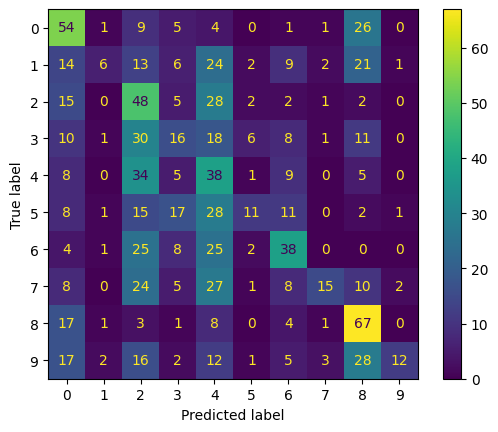

In [41]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for KNN:")
print(cm_knn)

# We can visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_test_pred)

### Classification Report

In [42]:
from sklearn.metrics import classification_report

print("Classification Report for KNN:")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Classification Report for KNN:
              precision    recall  f1-score   support

    airplane       0.35      0.53      0.42       101
  automobile       0.46      0.06      0.11        98
        bird       0.22      0.47      0.30       103
         cat       0.23      0.16      0.19       101
        deer       0.18      0.38      0.24       100
         dog       0.42      0.12      0.18        94
        frog       0.40      0.37      0.38       103
       horse       0.62      0.15      0.24       100
        ship       0.39      0.66      0.49       102
       truck       0.75      0.12      0.21        98

    accuracy                           0.30      1000
   macro avg       0.40      0.30      0.28      1000
weighted avg       0.40      0.30      0.28      1000



Visualizing Misclassified Example

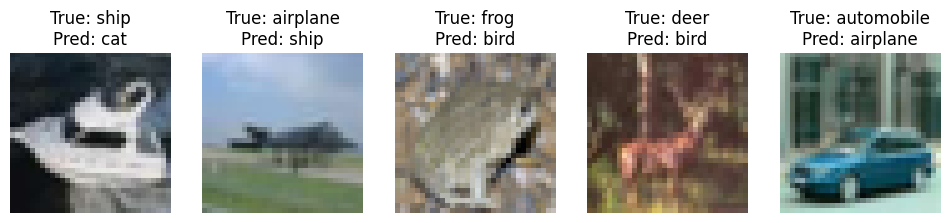

In [43]:
misclassified_idx = np.where(y_test != y_test_pred)[0]
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    idx = misclassified_idx[i]
    ax.imshow(X_test[idx].reshape(32, 32, 3))
    ax.set_title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_test_pred[idx]]}")
    ax.axis("off")
plt.show()